<a href="https://colab.research.google.com/github/vishakha1221/datascience-practical/blob/main/Practical5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
!pip install fitter

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.722736,760.793457,763.780654,inf,0.084796,0.996190
gamma,0.722771,760.172708,763.159905,inf,0.087420,0.994390
norm,0.723200,759.116203,761.107668,inf,0.103759,0.967045
uniform,0.734694,715.069612,717.061077,inf,0.185714,0.442233
expon,0.754418,777.267744,779.259209,inf,0.264739,0.099982


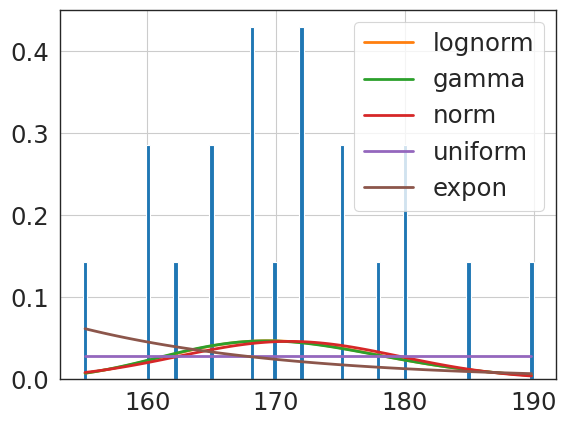

In [61]:
#Take the Dataset and Fit using Fitter

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

data = [170, 165, 180, 172, 160, 175, 168, 155, 185, 190,
        162, 178, 168, 172, 180, 160, 165, 172, 168, 175]

# Convert to NumPy array
data = np.array(data)
f = Fitter(data,
           distributions=['norm','uniform','expon','gamma','lognorm'],
           timeout=30)
f.fit()

# Show summary (best-fit distribution + parameters + AIC/BIC)
f.summary()

In [62]:
#Get best-fit distribution

best = f.get_best()
print("Best fit distribution and parameters:\n", best)

Best fit distribution and parameters:
 {'lognorm': {'s': 0.12789590528409436, 'loc': 103.74063558874319, 'scale': 66.71229781446074}}


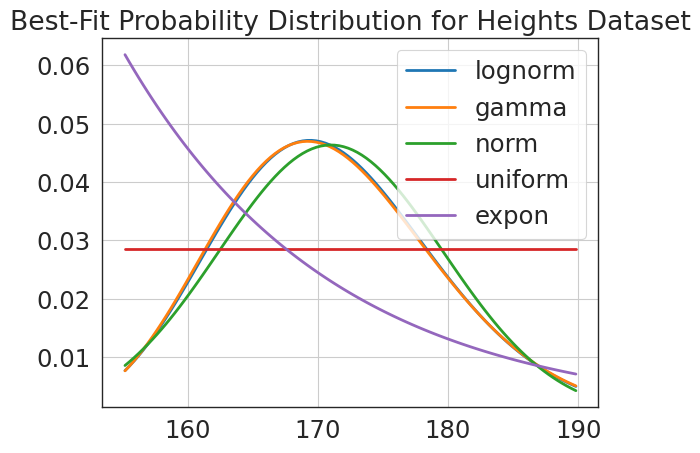

In [63]:
#Plot Histogram + Best-fit PDF

f.plot_pdf()
plt.title("Best-Fit Probability Distribution for Heights Dataset")
plt.show()

***Practical file part***

In [64]:
dataset = pd.read_csv("weight-height.csv")
dataset.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [65]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


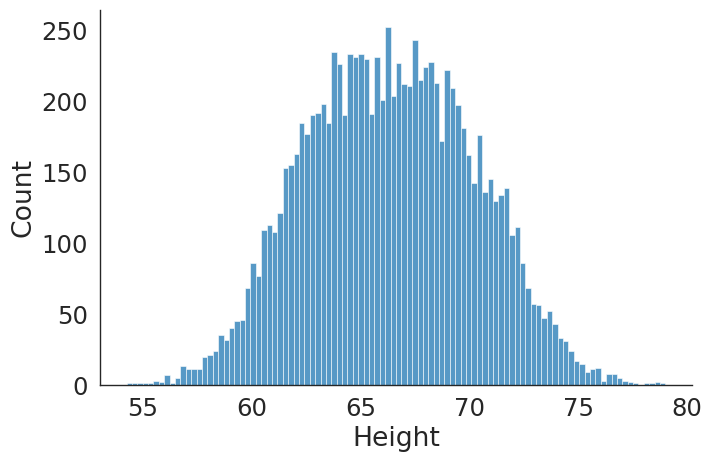

In [66]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=dataset, x="Height", kind="hist", bins = 100, aspect = 1.5)

In [67]:
height = dataset["Height"].values

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.003108,848.384299,877.225660,inf,0.013858,4.254279e-02
lognorm,0.005285,803.794915,825.425936,inf,0.022982,5.083835e-05
gamma,0.005296,803.860095,825.491116,inf,0.023553,2.987814e-05
norm,0.005383,802.162043,816.582724,inf,0.025554,4.177451e-06
burr,0.014954,873.340116,902.181478,inf,0.063097,4.698479e-35


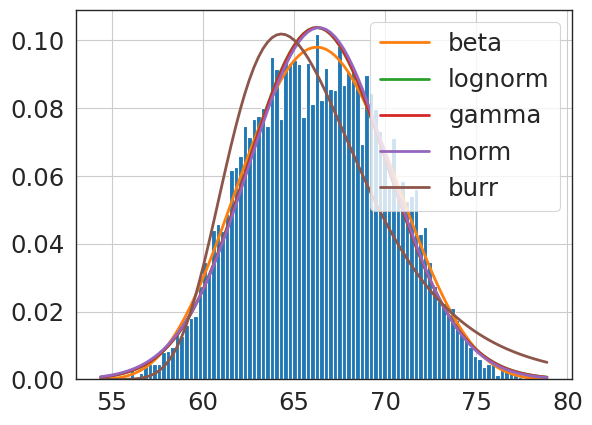

In [68]:
f = Fitter(height,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

In [69]:
f.get_best(method = 'sumsquare_error')

{'beta': {'a': 5.958319408062241,
  'b': 6.498169312519776,
  'loc': 52.87268950557022,
  'scale': 28.213574971918785}}

In [70]:
f.fitted_param["beta"]

(5.958319408062241, 6.498169312519776, 52.87268950557022, 28.213574971918785)

In [71]:
get_common_distributions()

['cauchy',
 'chi2',
 'expon',
 'exponpow',
 'gamma',
 'lognorm',
 'norm',
 'powerlaw',
 'rayleigh',
 'uniform']

In [72]:
mu, sigma = 0, 0.1 # mean and standard deviation
data = np.random.normal(mu, sigma, 10000)
data

array([ 0.07511336,  0.06705966, -0.15209619, ..., -0.04945709,
       -0.05694157, -0.04393242])

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,1.298080,241.414408,255.835089,inf,0.009226,3.600745e-01
lognorm,1.353032,245.244771,266.875792,inf,0.010587,2.107955e-01
gamma,1.357215,243.945107,265.576128,inf,0.011156,1.646247e-01
chi2,3.847279,267.953588,289.584610,inf,0.035715,1.615991e-11
exponpow,17.453839,453.022998,474.654019,inf,0.058339,5.012358e-30


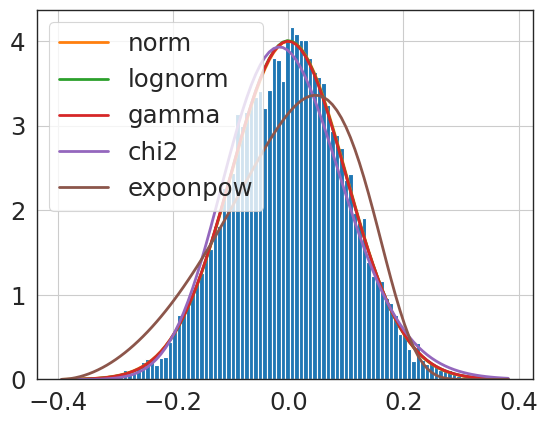

In [73]:
f = Fitter(data,
           distributions= get_common_distributions())
f.fit()
f.summary()

In [74]:
f.get_best(method = 'sumsquare_error')

{'norm': {'loc': 0.0008170502665106165, 'scale': 0.0996677786086131}}

In [75]:
get_distributions()

['_fit',
 'alpha',
 'anglit',
 'arcsine',
 'argus',
 'beta',
 'betaprime',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'cosine',
 'crystalball',
 'dgamma',
 'dpareto_lognorm',
 'dweibull',
 'erlang',
 'expon',
 'exponnorm',
 'exponpow',
 'exponweib',
 'f',
 'fatiguelife',
 'fisk',
 'foldcauchy',
 'foldnorm',
 'gamma',
 'gausshyper',
 'genexpon',
 'genextreme',
 'gengamma',
 'genhalflogistic',
 'genhyperbolic',
 'geninvgauss',
 'genlogistic',
 'gennorm',
 'genpareto',
 'gibrat',
 'gompertz',
 'gumbel_l',
 'gumbel_r',
 'halfcauchy',
 'halfgennorm',
 'halflogistic',
 'halfnorm',
 'hypsecant',
 'invgamma',
 'invgauss',
 'invweibull',
 'irwinhall',
 'jf_skew_t',
 'johnsonsb',
 'johnsonsu',
 'kappa3',
 'kappa4',
 'ksone',
 'kstwo',
 'kstwobign',
 'landau',
 'laplace',
 'laplace_asymmetric',
 'levy',
 'levy_l',
 'levy_stable',
 'loggamma',
 'logistic',
 'loglaplace',
 'lognorm',
 'loguniform',
 'lomax',
 'maxwell',
 'mielke',
 'moyal',
 'multivariate_normal',
 'nakagami',
 '